In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df=pd.read_csv('/content/CRIME DATA.csv')

In [ ]:
df.head()

,STATE/UT,CRIME HEAD,2015,2016,2017,2018,2019,2020,2021,2022
0,ANDHRA PRADESH,MURDER,2665,2690,2449,2538,2808,2717,2484,1175
1,ARUNALACHALA PRADESH,MURDER,68,72,59,75,65,73,69,86
2,ASSAM,MURDER,1374,1426,1323,1223,1303,1368,1354,1451
3,BIHAR,MURDER,3034,3139,3152,3362,3198,3566,3441,3403
4,CHHATTISGARH,MURDER,1097,1169,1083,1065,1110,998,945,998


In [ ]:
years_title=[str(i)for i in range(2015,2022)]

In [ ]:
STATES_IN_INDIA=df['STATE/UT'].unique()
STATES_IN_INDIA=STATES_IN_INDIA[:-4]
STATES_IN_INDIA

array(['ANDHRA PRADESH', 'ARUNALACHALA PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMILNADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
       'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU',
       'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY', 'MURDER ',
       'ATTEMPT TO MURDER', 'RAPE', 'KIDNAPPING', 'ROBBERY', 'THEFT',
       'CHEATING', 'DOWRY DEATHS'], dtype=object)

In [ ]:
TYPES_OF_CASES=df['CRIME HEAD'].unique()
TYPES_OF_CASES=TYPES_OF_CASES[:-1]
TYPES_OF_CASES

array(['MURDER ', 'MURDER TOTAL', 'ATTEMPT TO MURDER',
       ' ATTEMPT TO MURDER TOTAL', 'RAPE', ' RAPE TOTAL', 'KIDNAPPING',
       'KIDNAPPING TOTAL', 'ROBBERY', 'ROBBERY TOTAL', 'THEFT',
       'THEFT TOTAL', 'CHEATING', ' CHETATING TOTAL', 'DOWRY DEATHS',
       'DOWRY DEATHS TOTAL', 'RIOTS', 'RIOTS TOTAL', 'DACOITY',
       'DACOITY TOTAL', 'BURGLARY', 'TOTAL BURGLARY', 'AUTO THEFT'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATE/UT    432 non-null    object
 1   CRIME HEAD  432 non-null    object
 2   2015        432 non-null    int64 
 3   2016        432 non-null    int64 
 4   2017        432 non-null    int64 
 5   2018        432 non-null    int64 
 6   2019        432 non-null    int64 
 7   2020        432 non-null    int64 
 8   2021        432 non-null    int64 
 9   2022        432 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 33.9+ KB


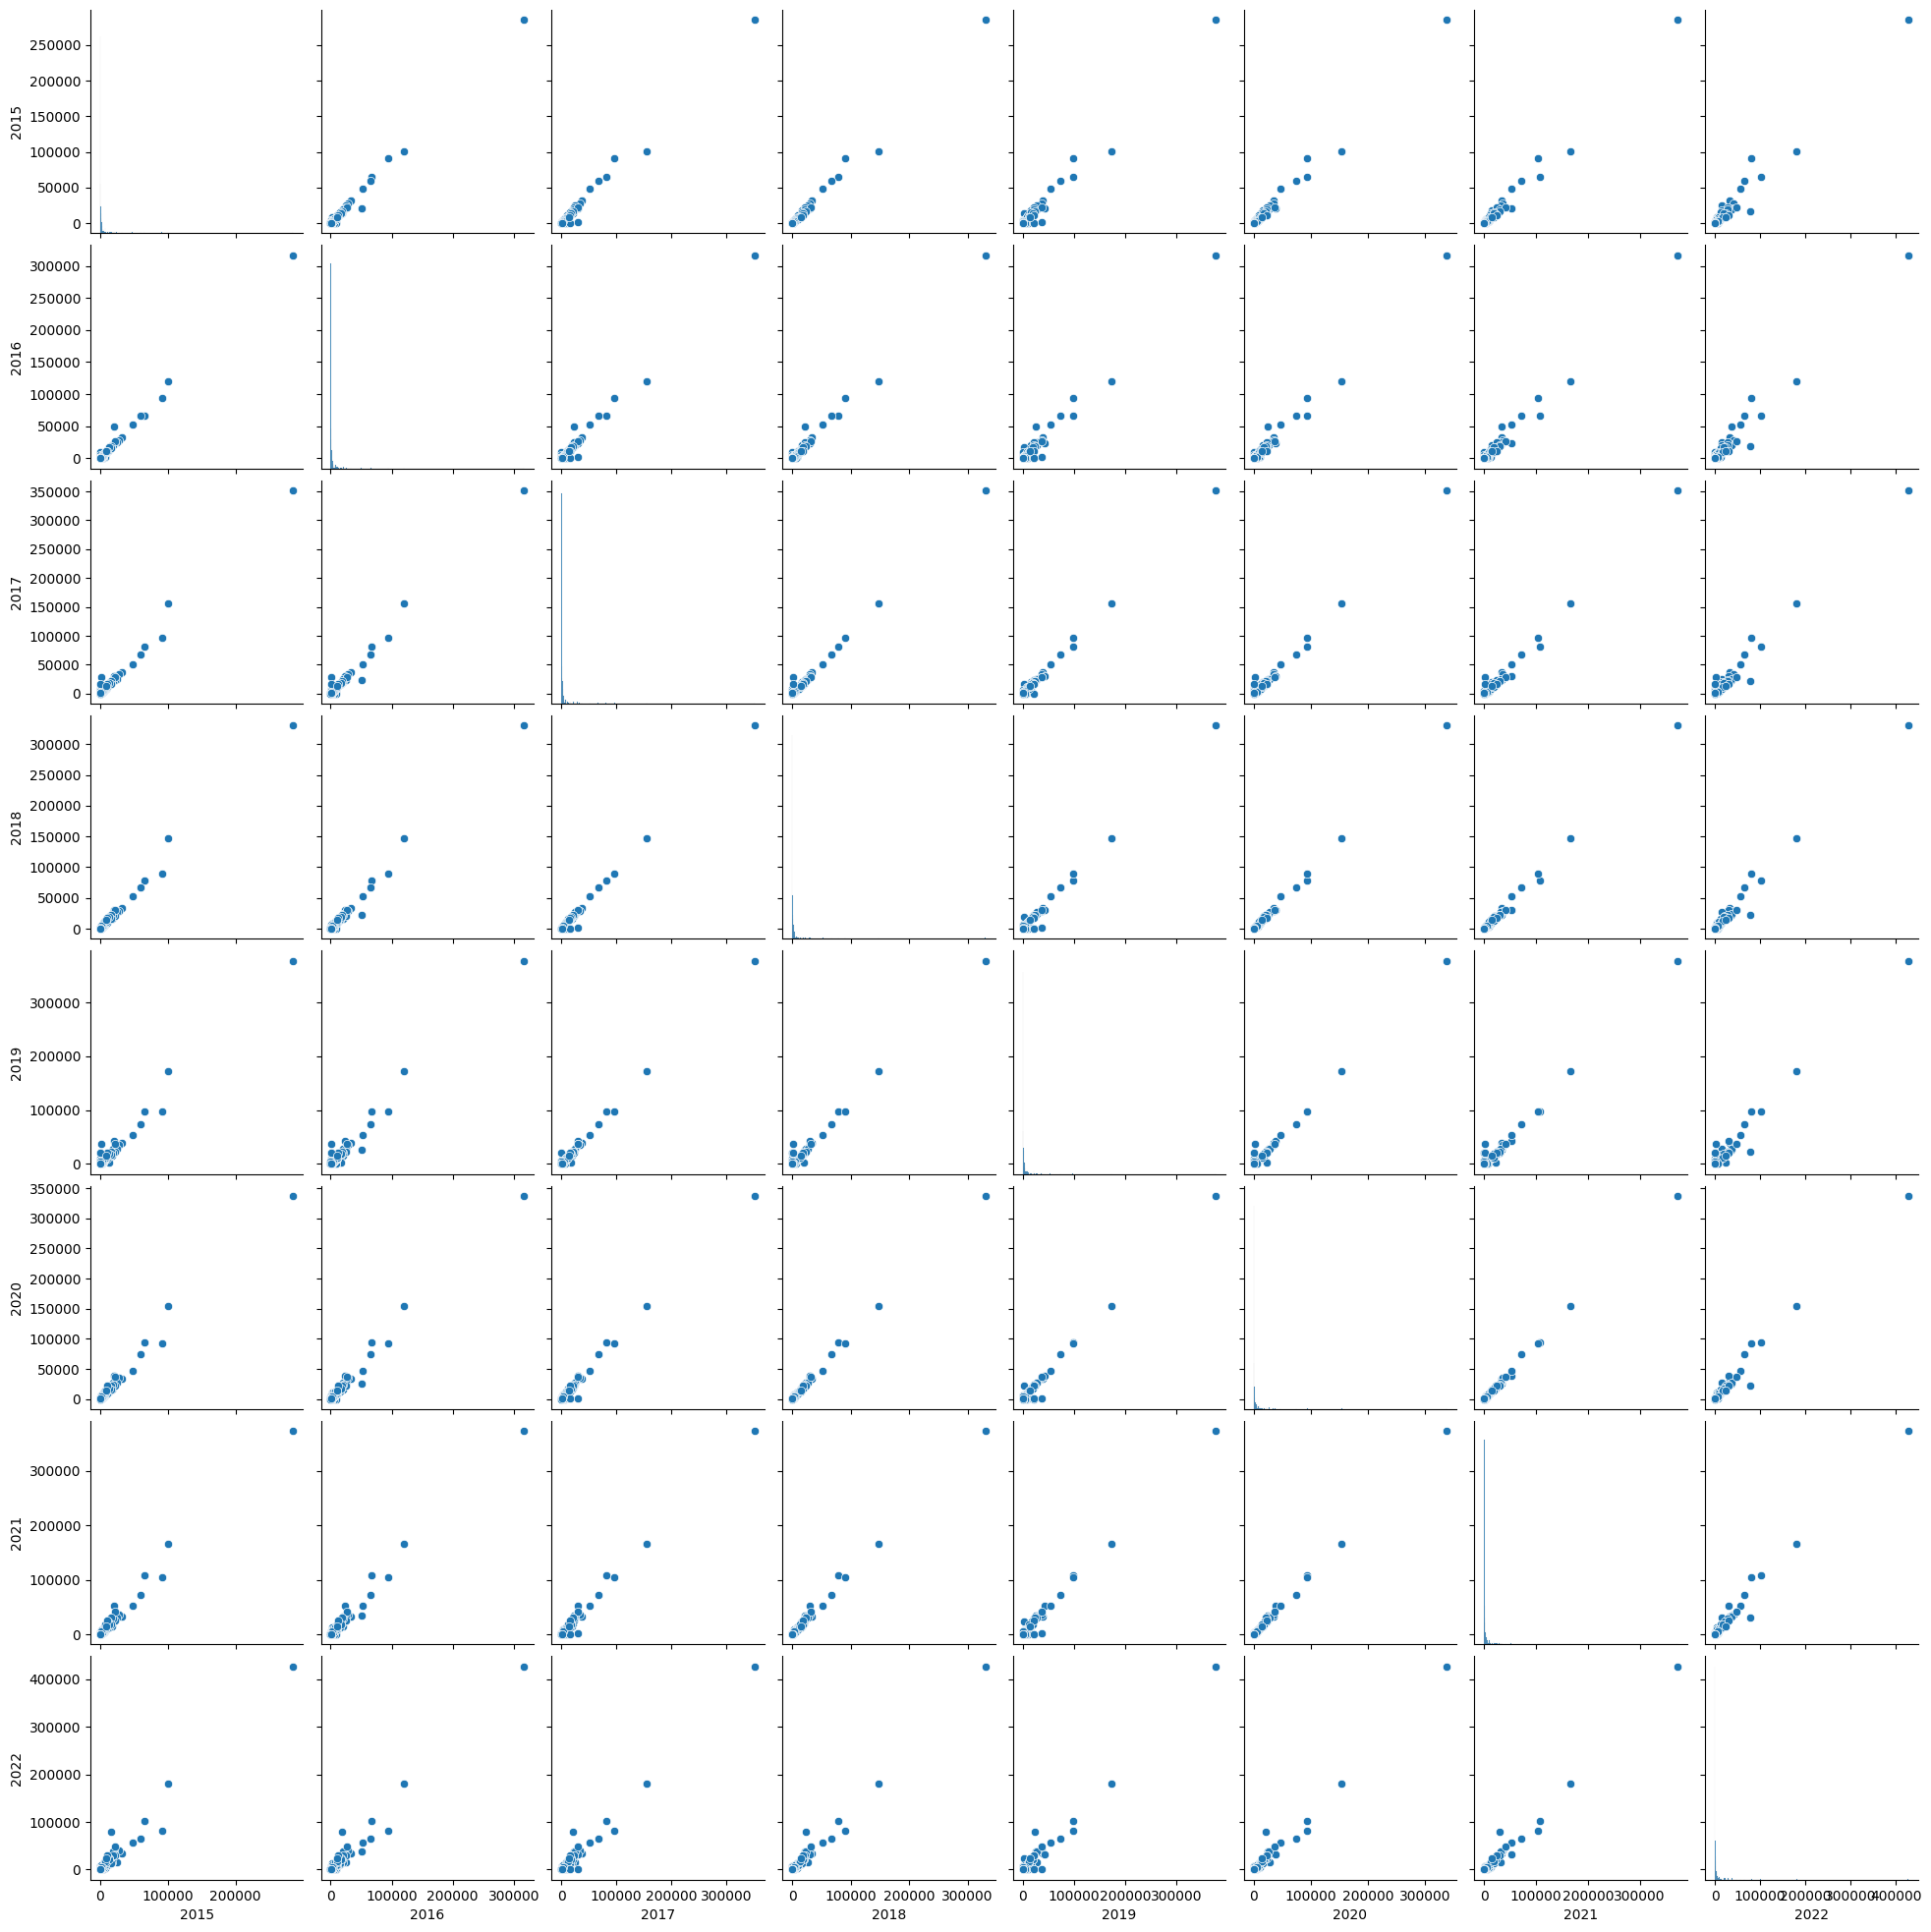

In [ ]:
sns.pairplot(df)

<ipython-input-10-79a46f3ff710>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(df.corr())
<ipython-input-10-79a46f3ff710>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'coolwarm', mask=mask,ax=ax)


<Axes: >

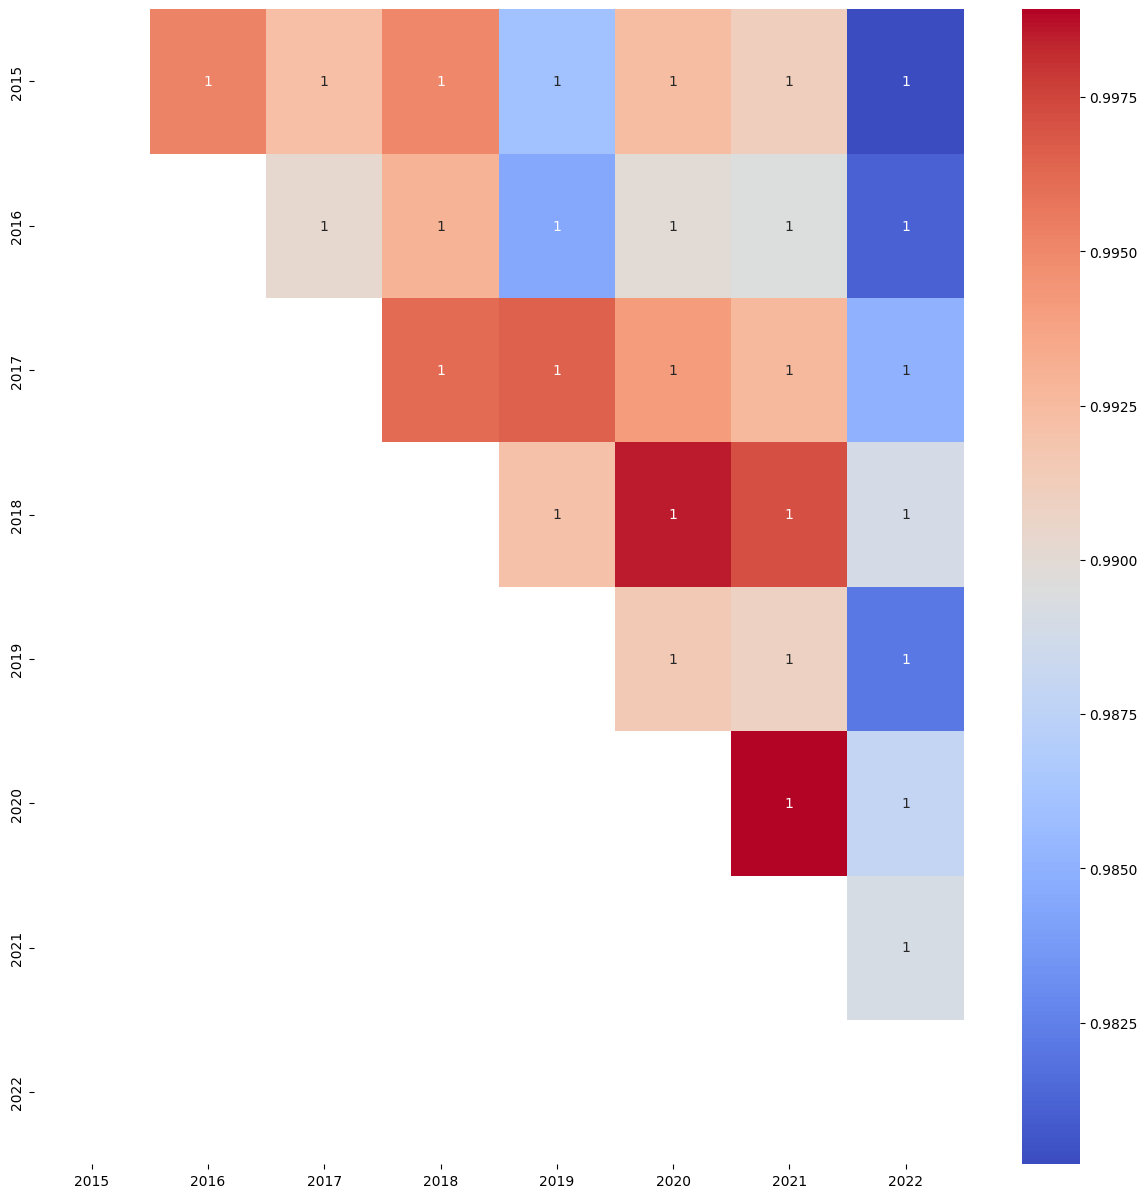

In [ ]:
mask = np.tril(df.corr())
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'coolwarm', mask=mask,ax=ax)

<ipython-input-11-8166f2fa4f9c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(12,8), dpi=80, facecolor='w',edgecolor='k')


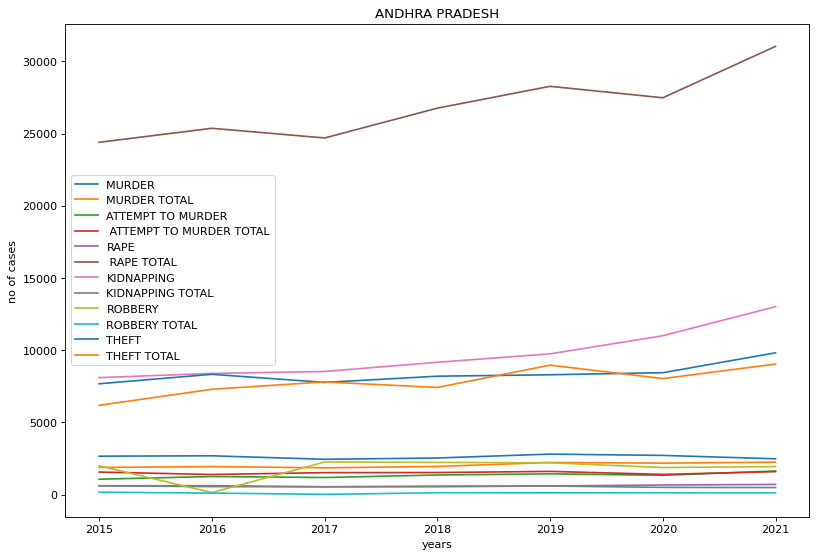

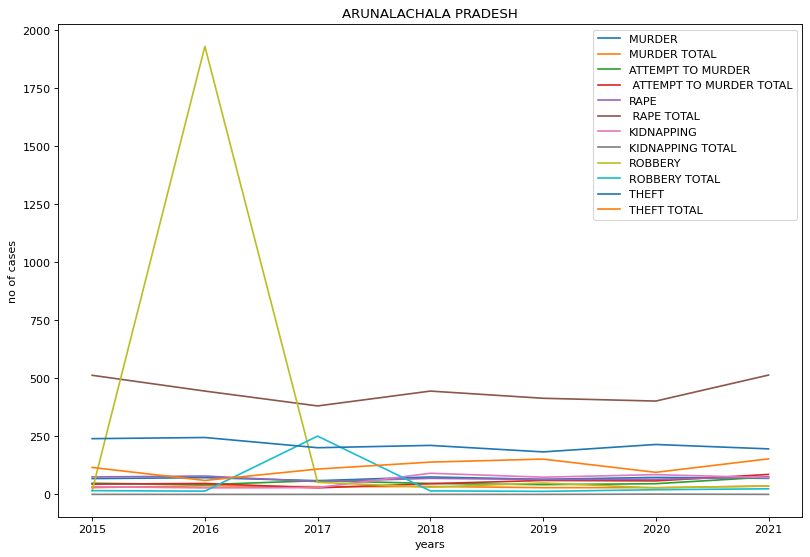

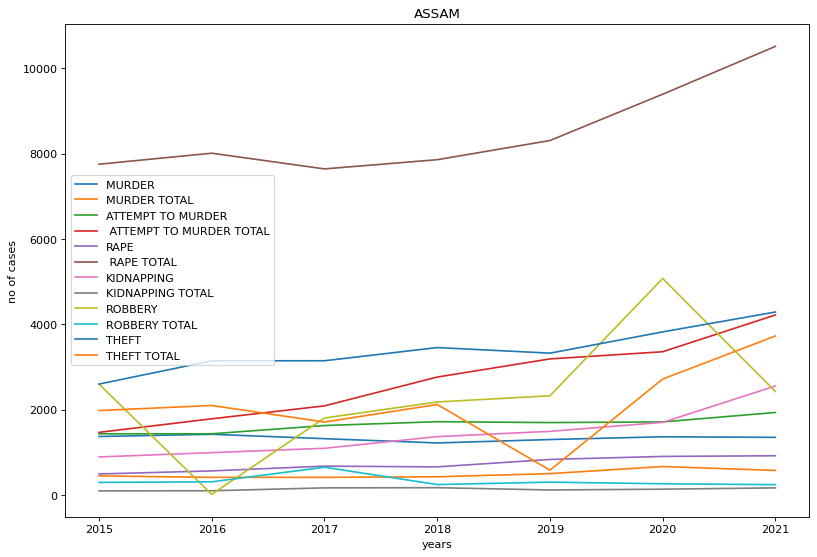

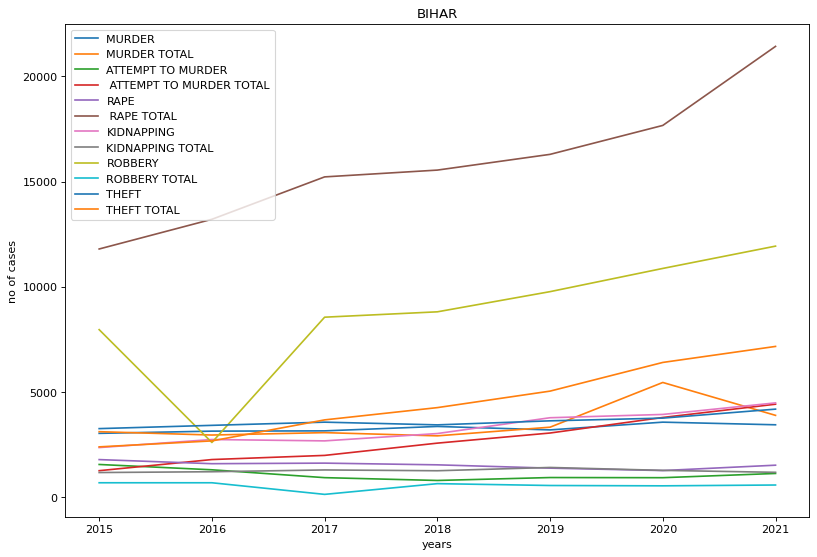

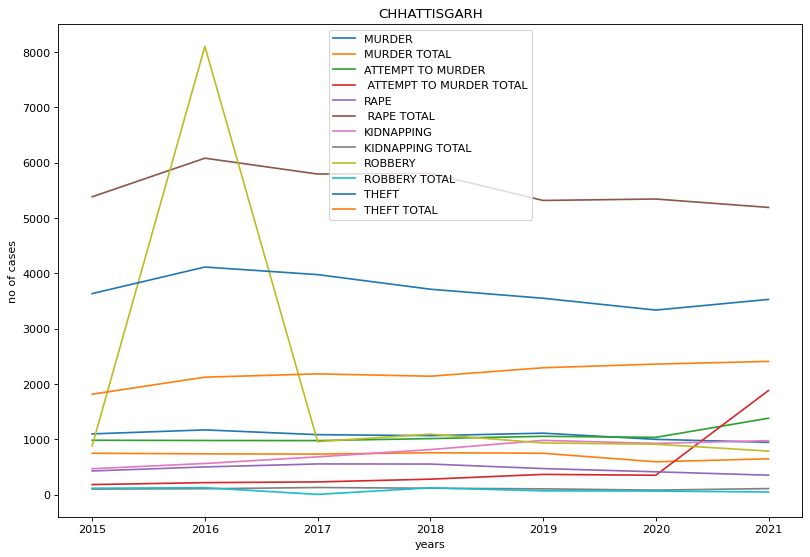

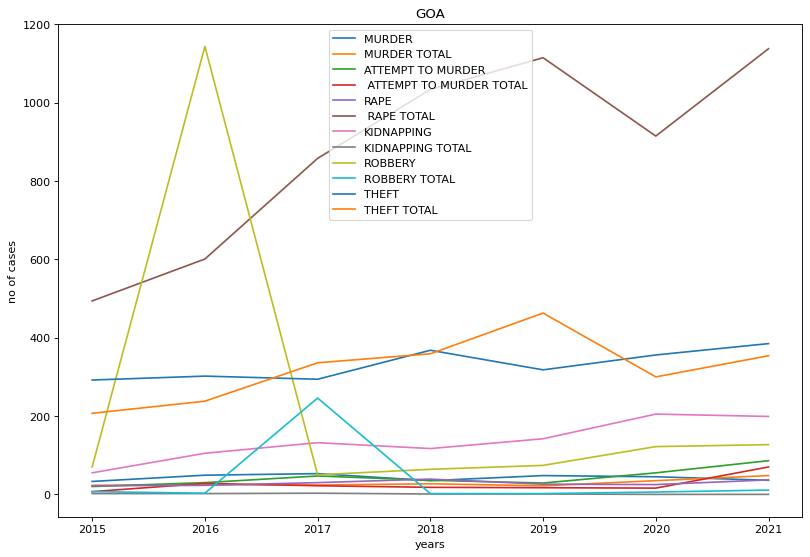

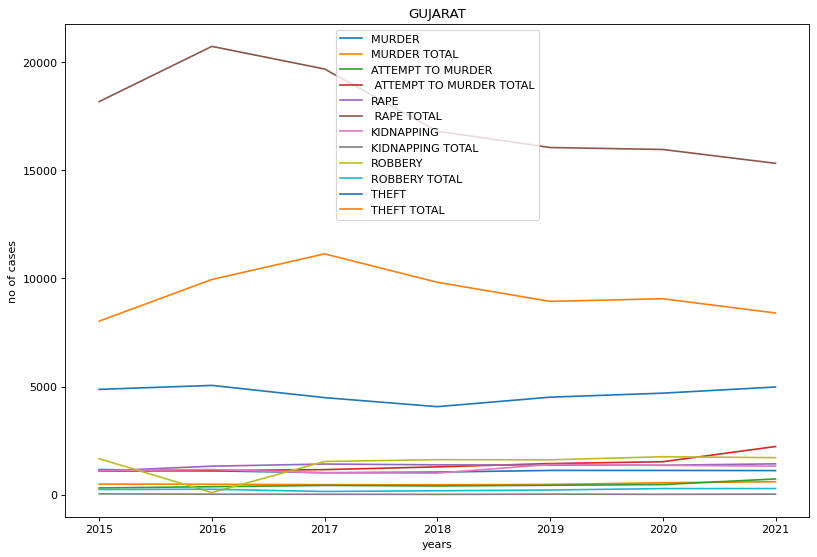

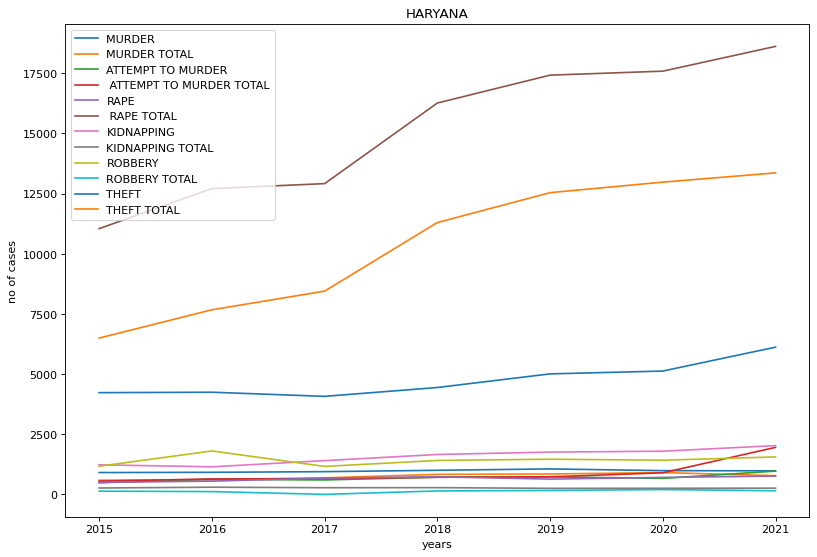

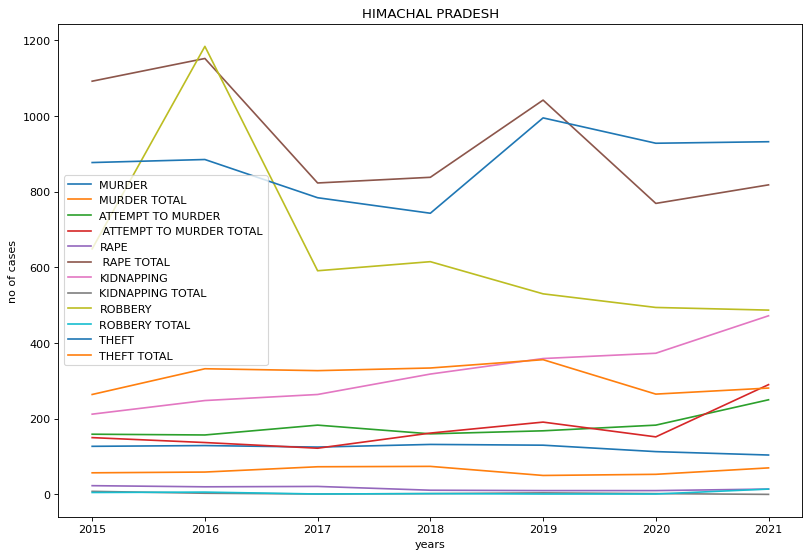

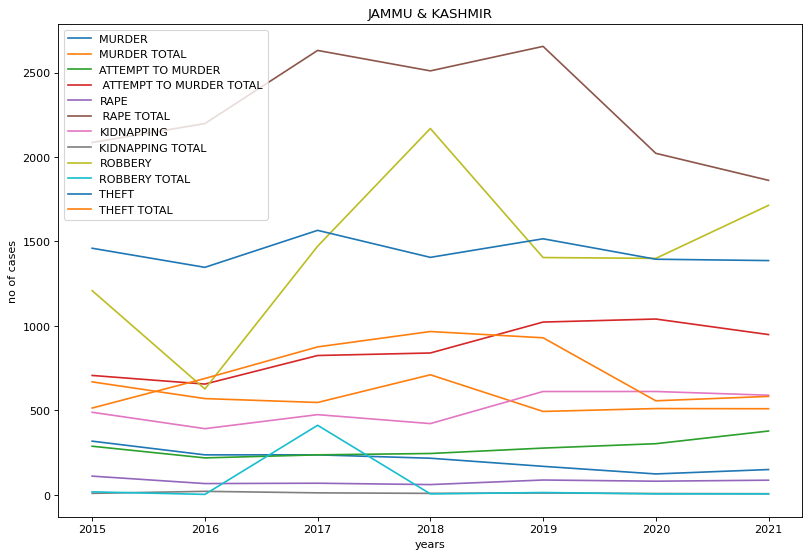

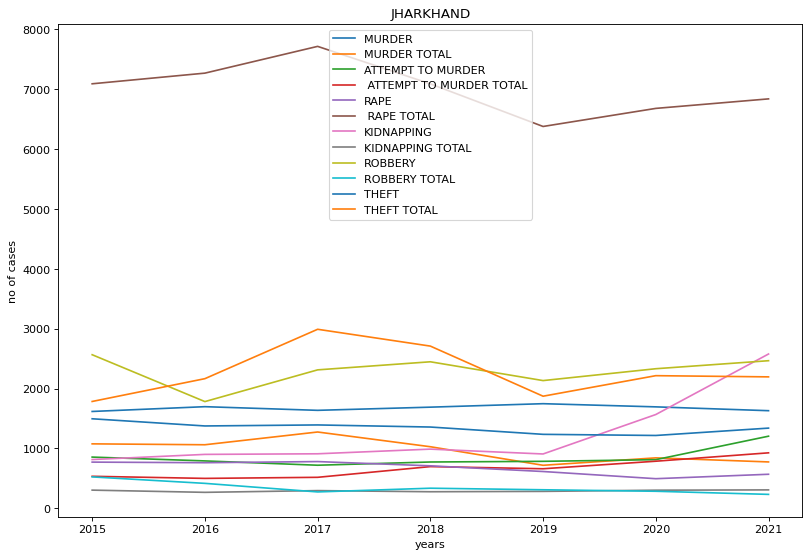

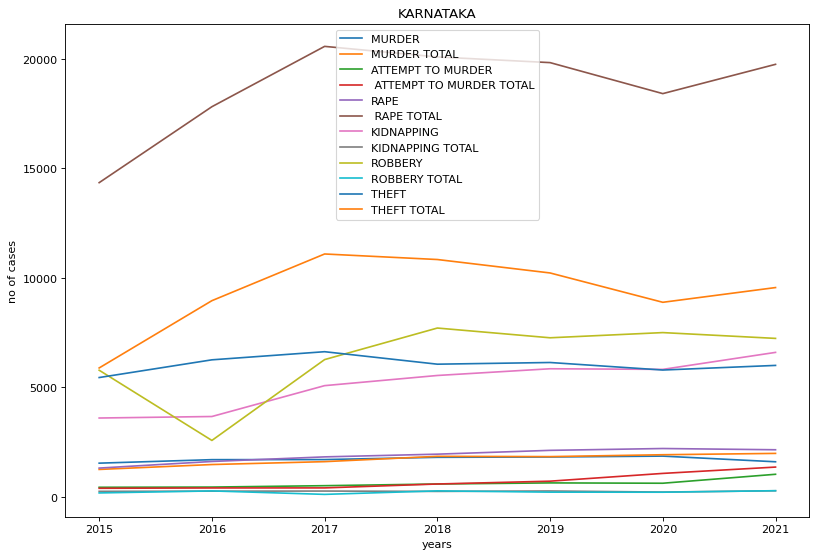

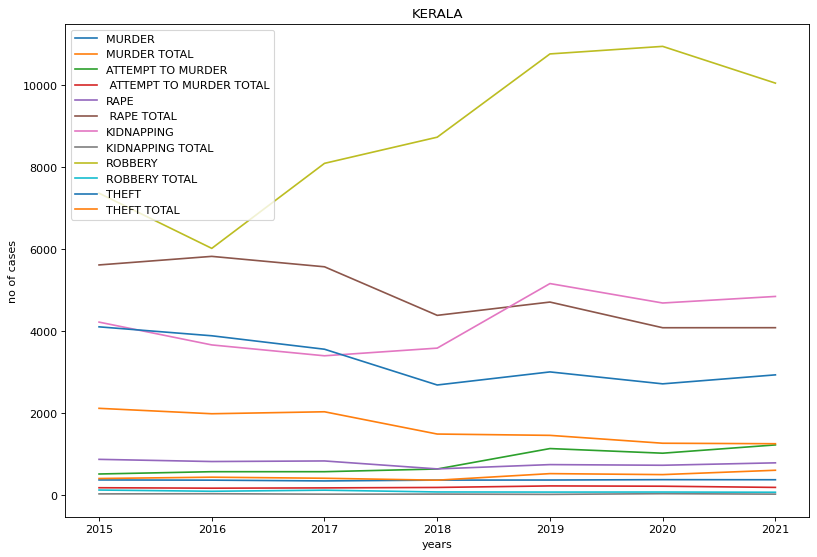

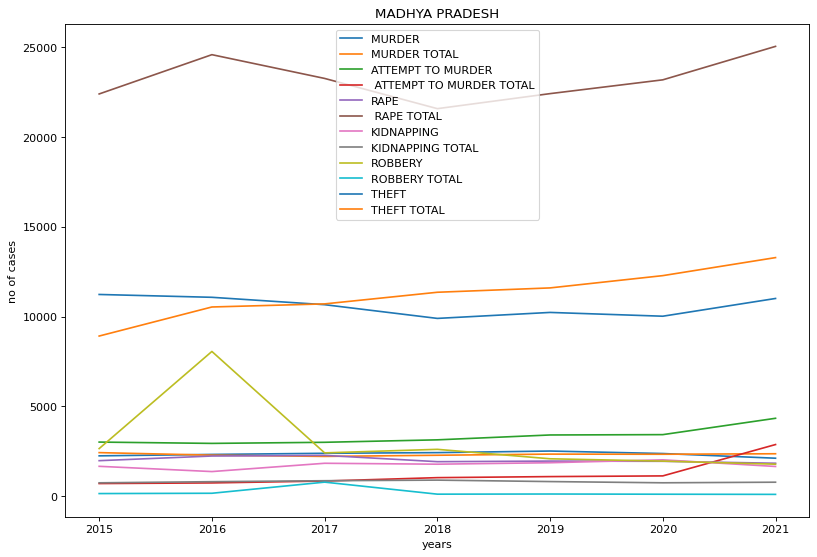

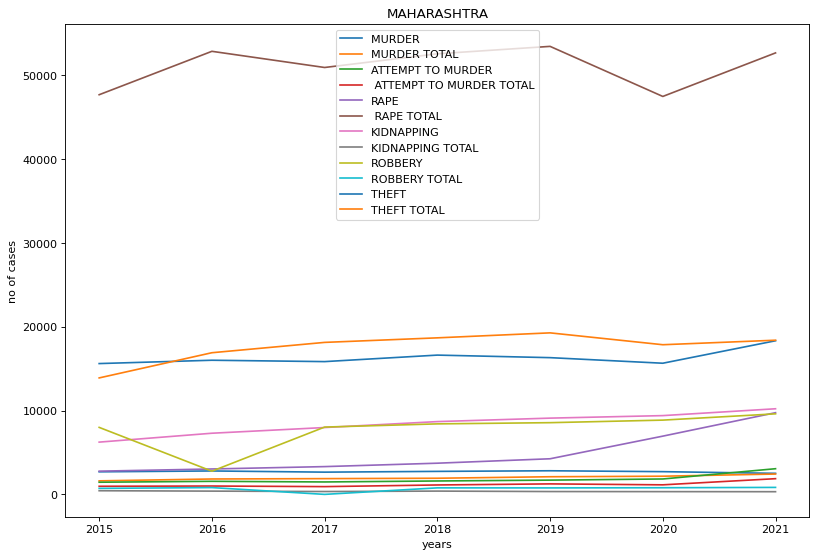

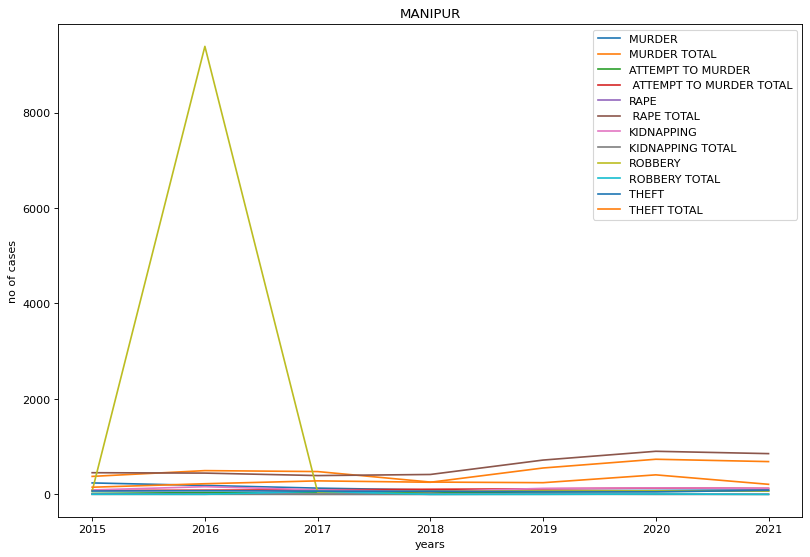

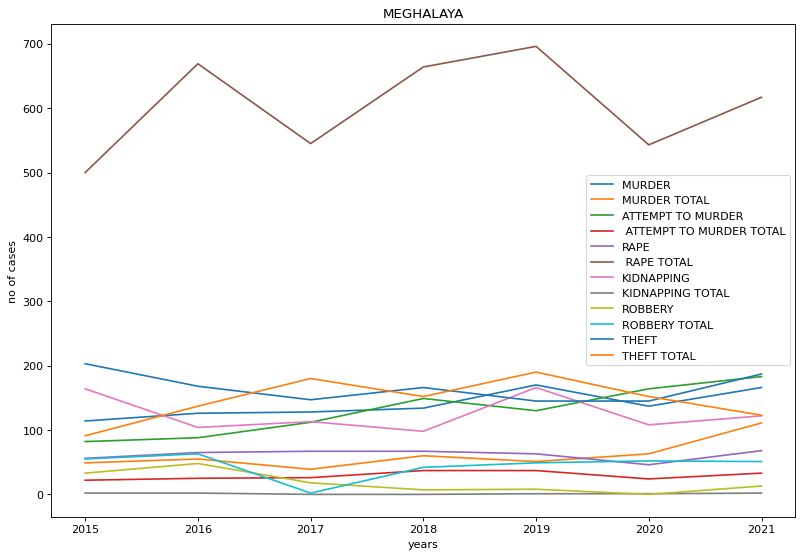

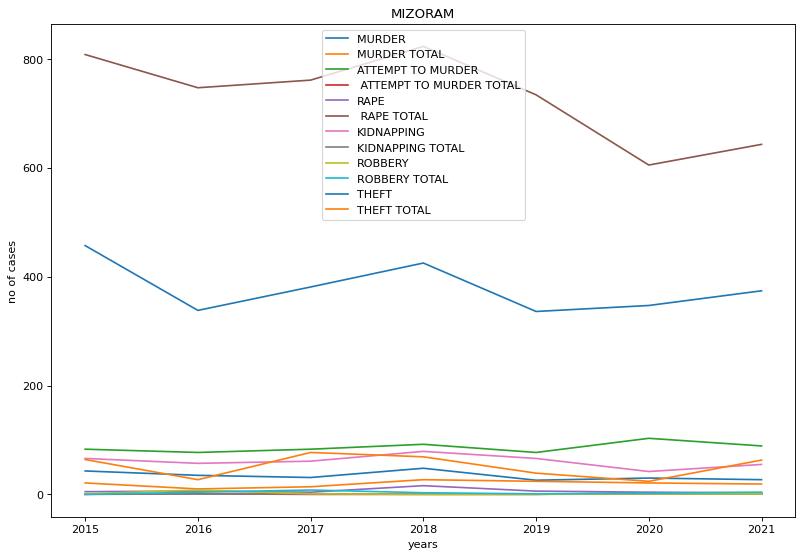

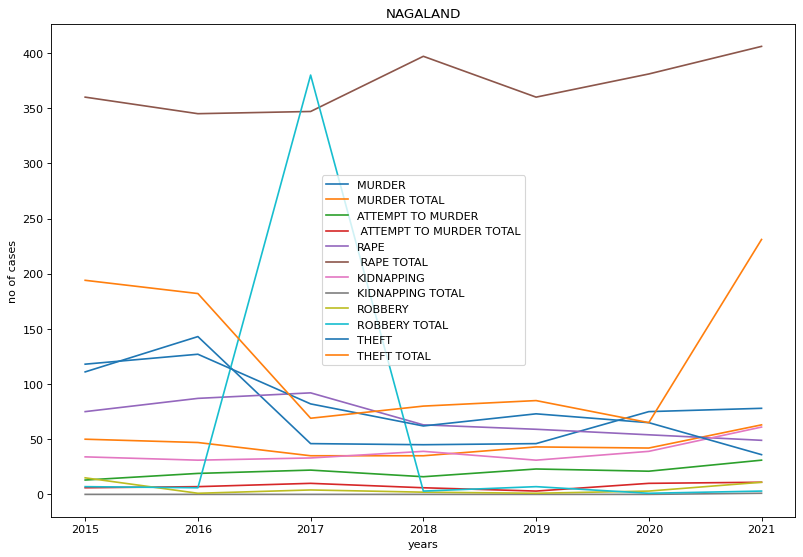

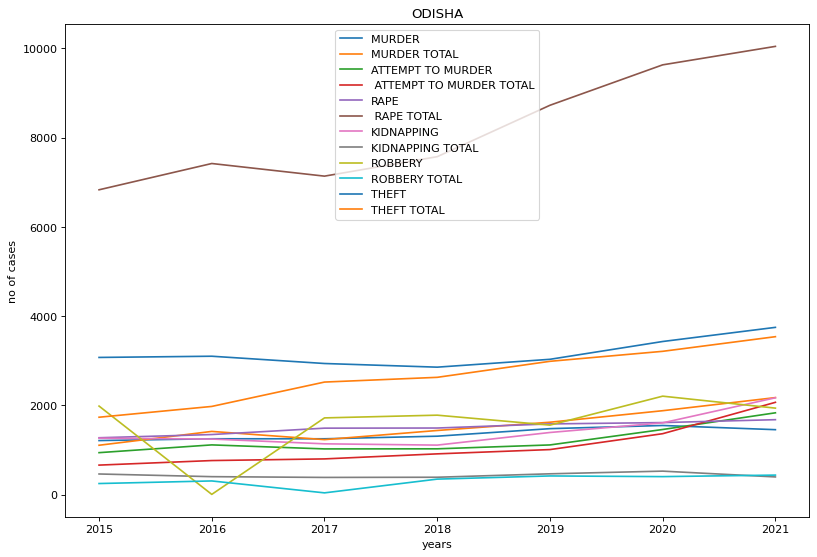

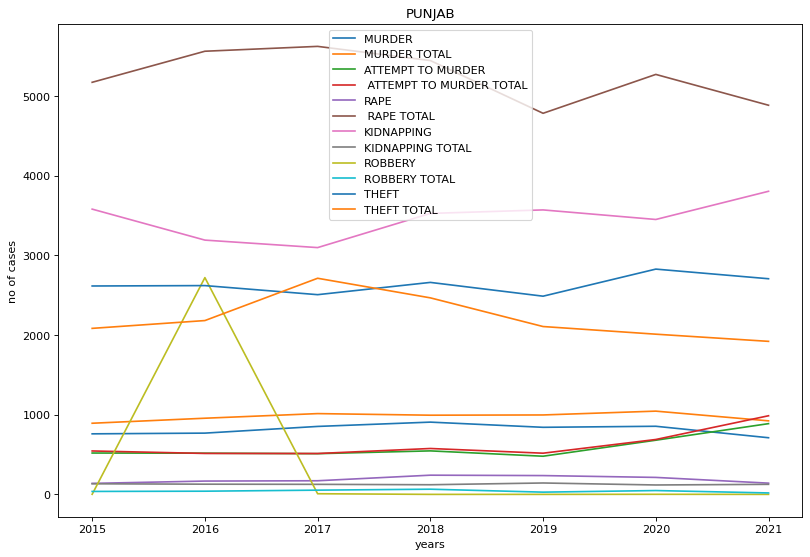

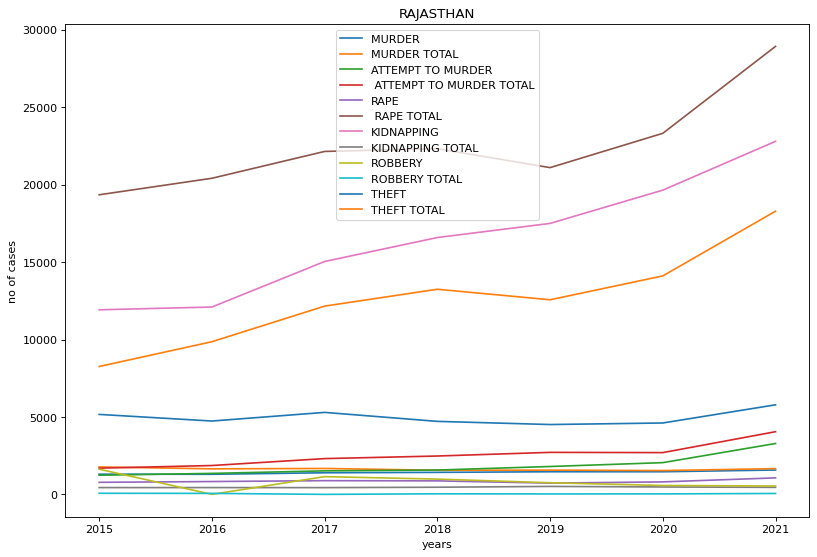

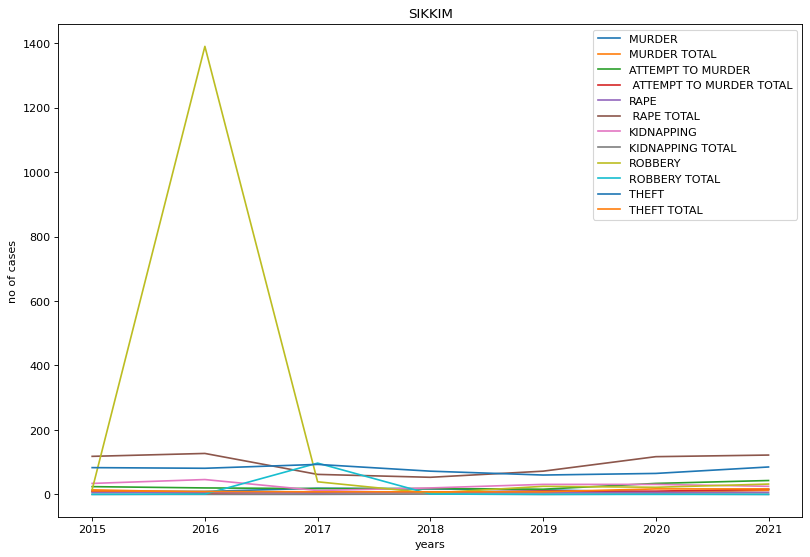

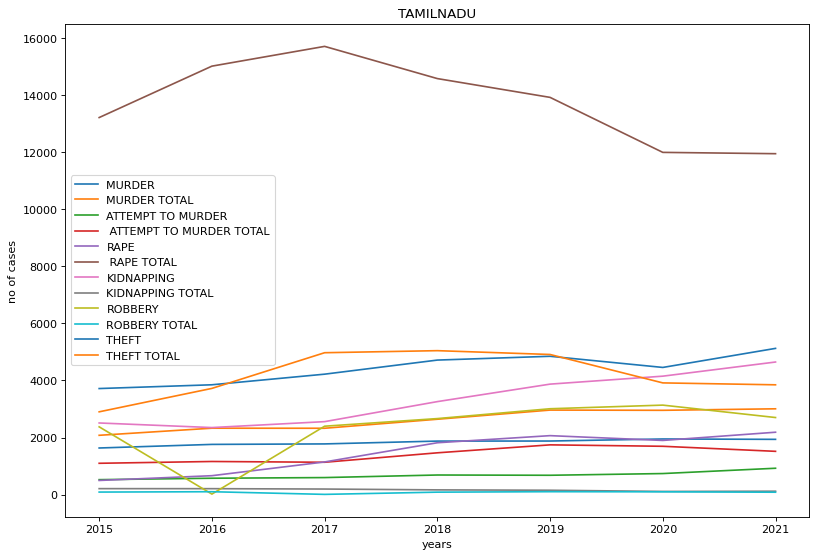

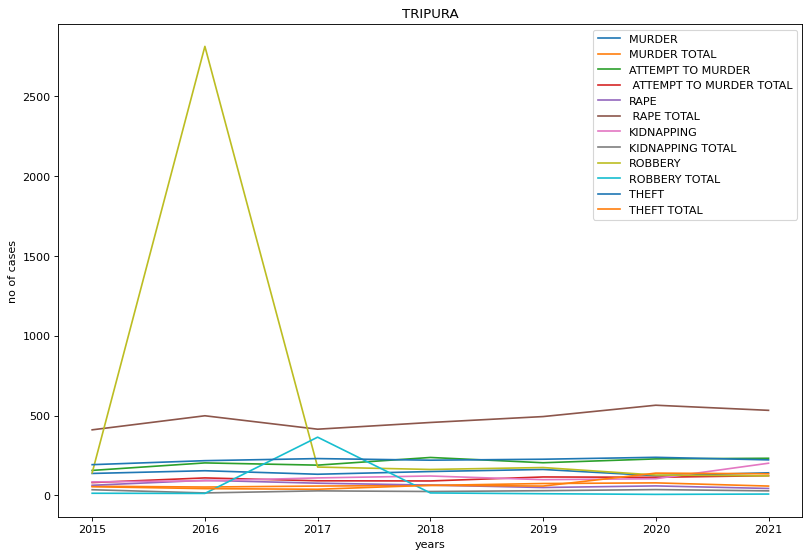

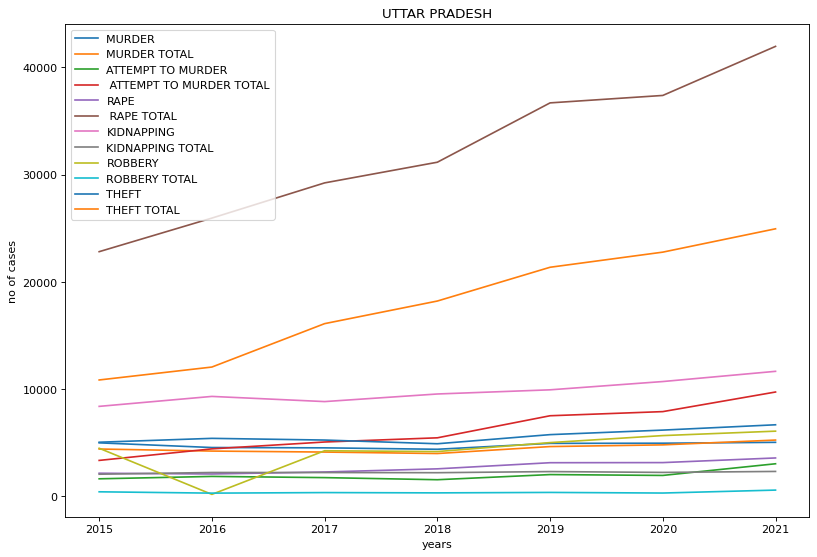

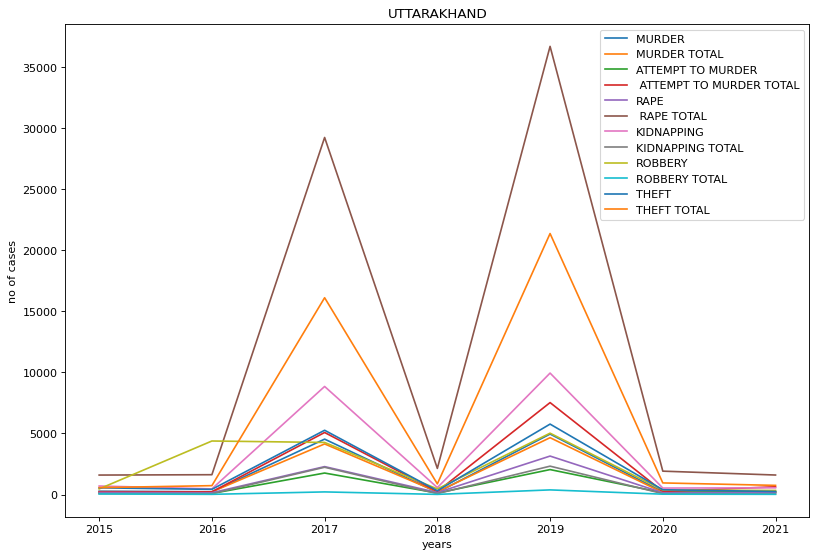

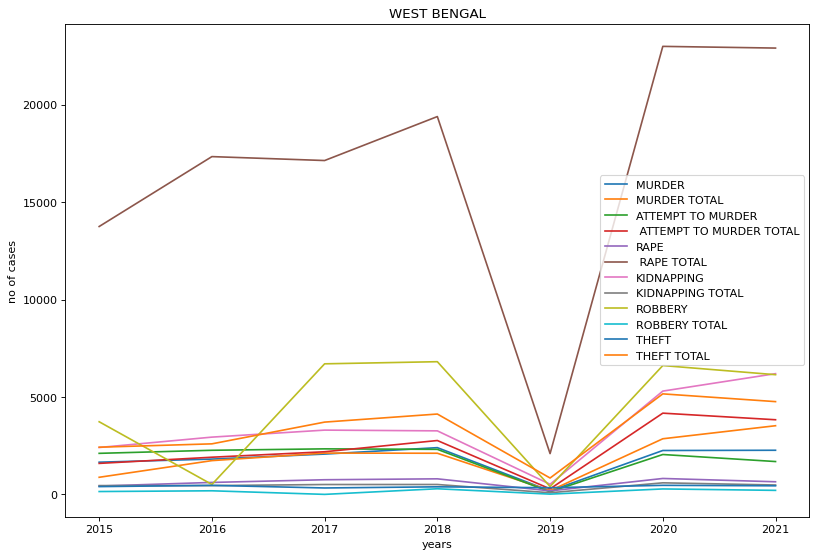

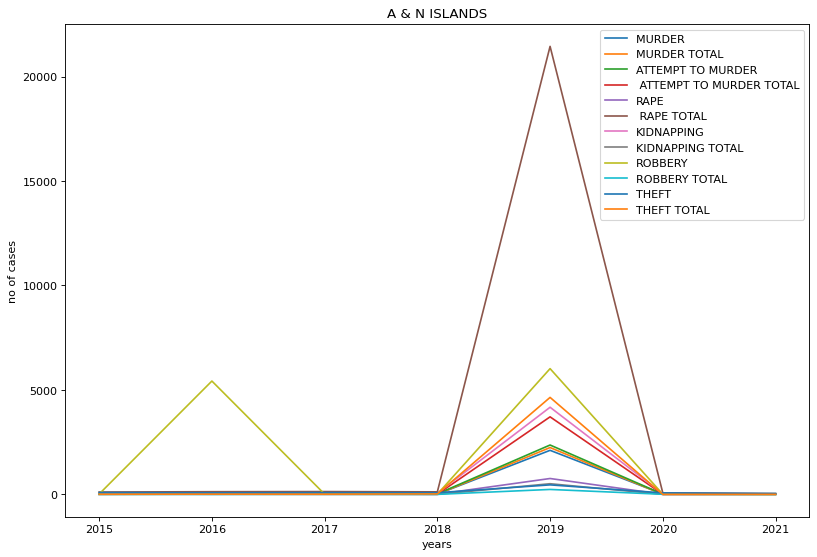

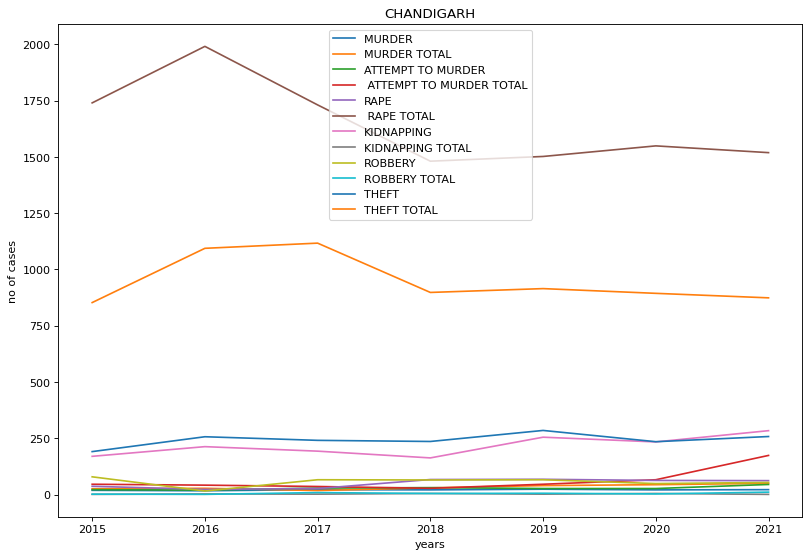

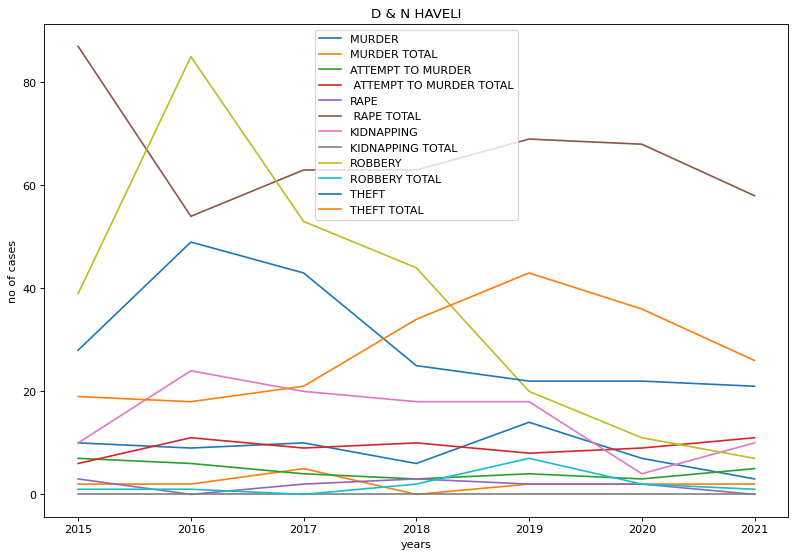

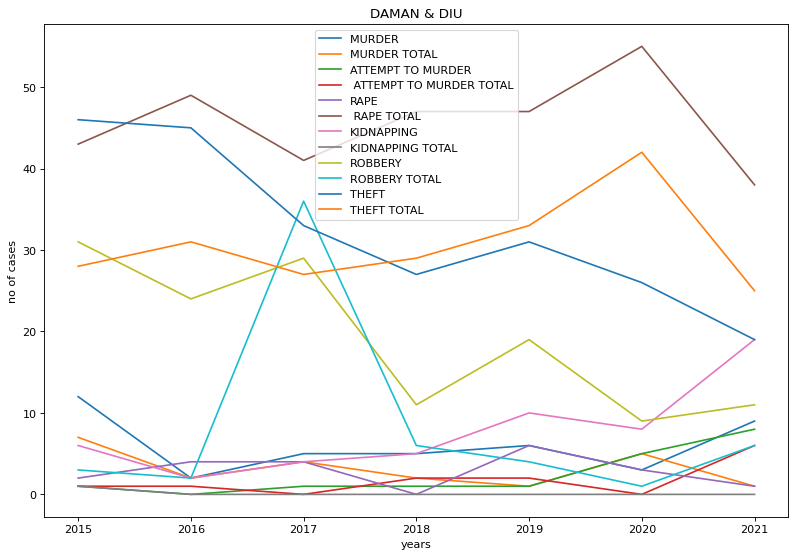

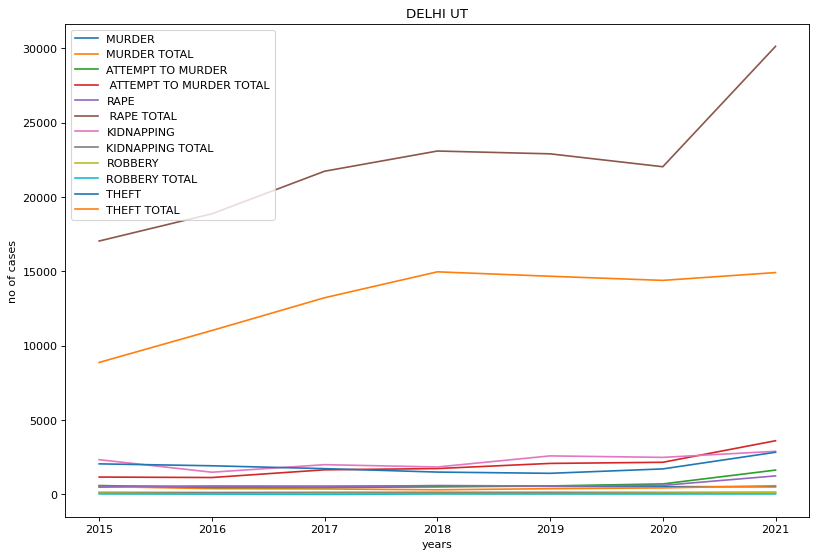

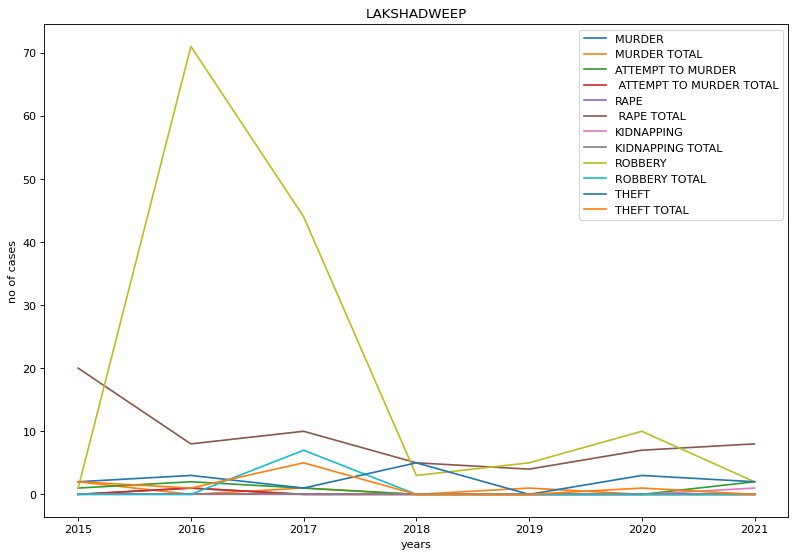

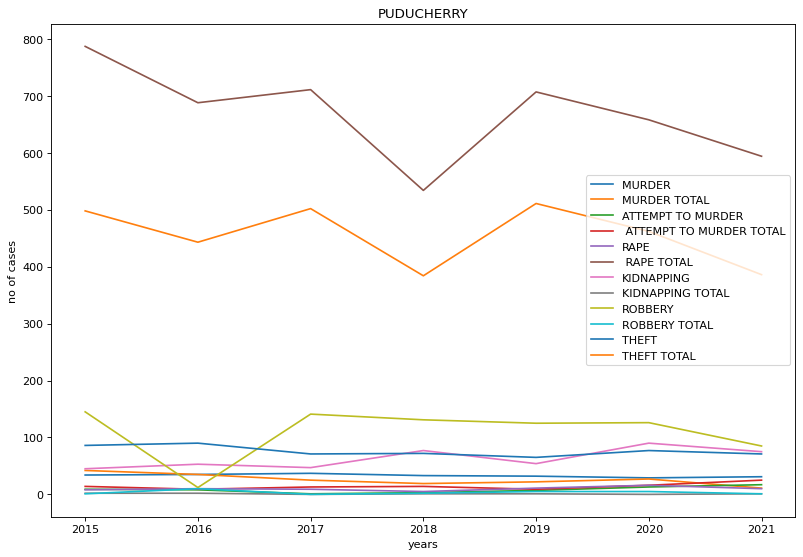

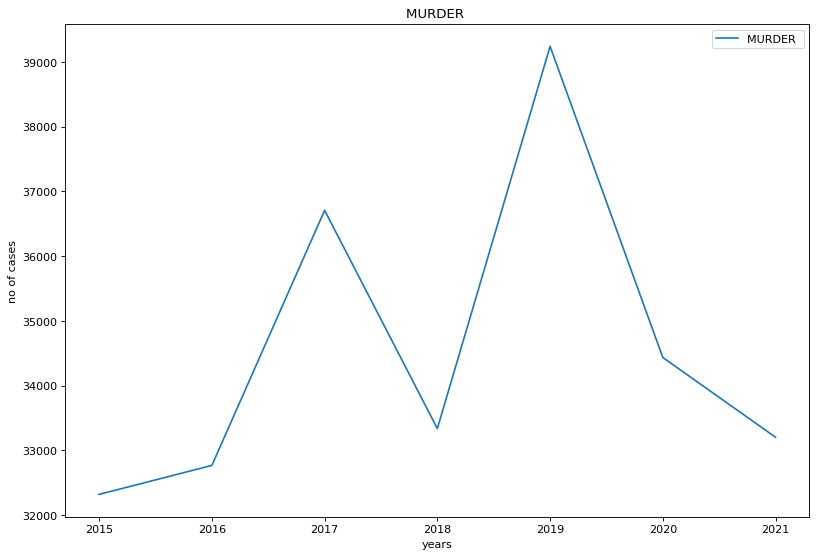

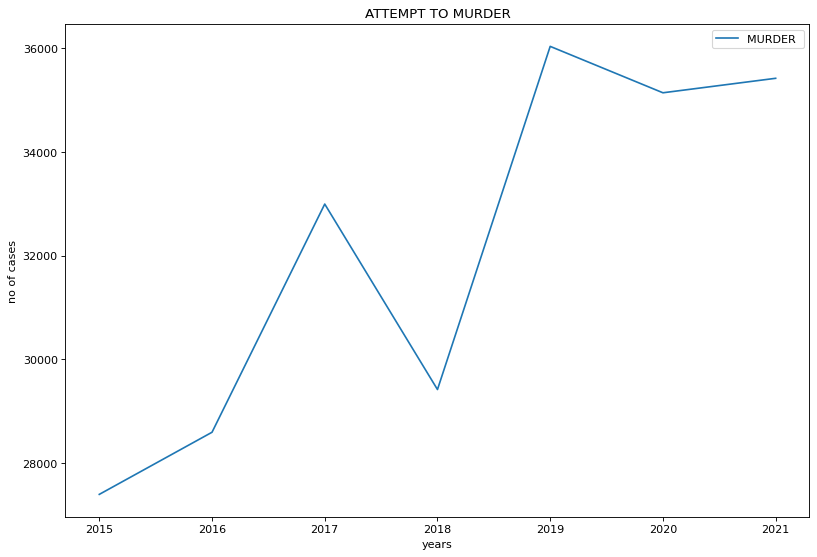

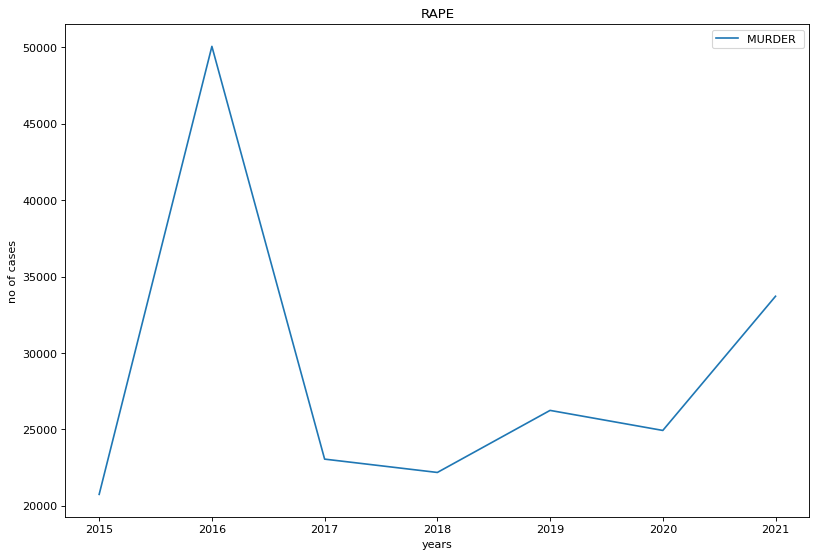

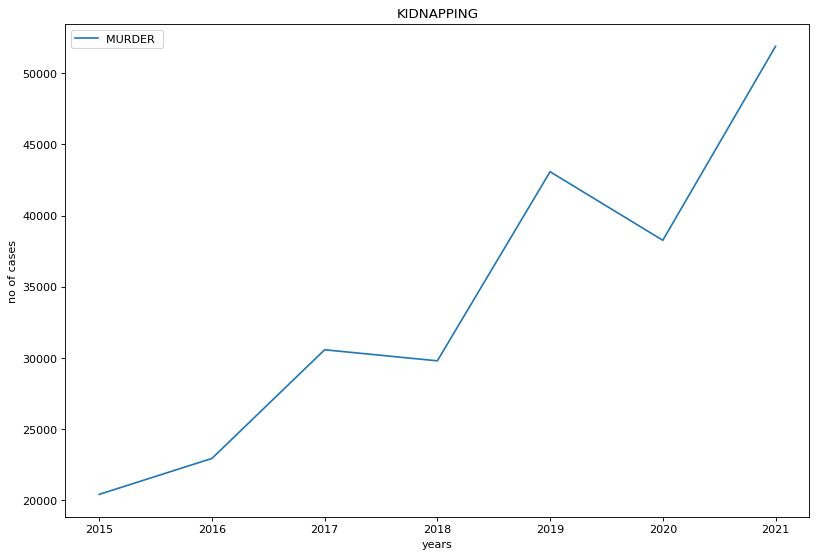

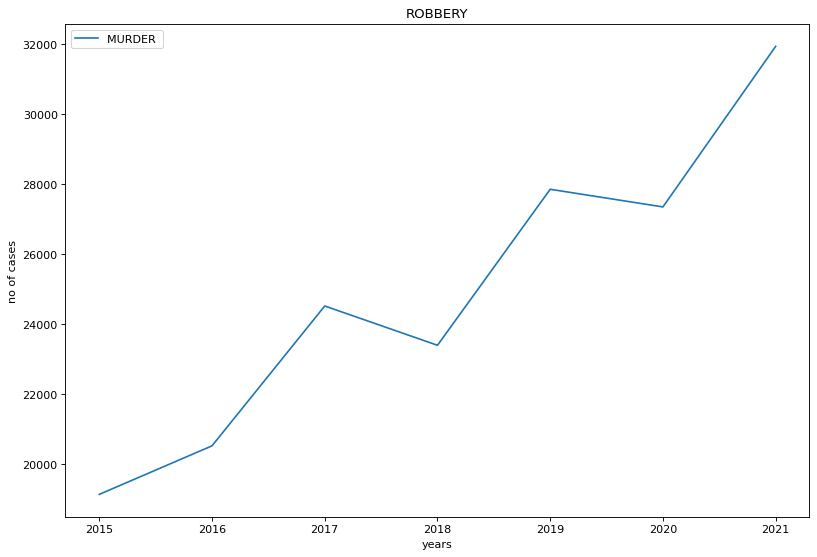

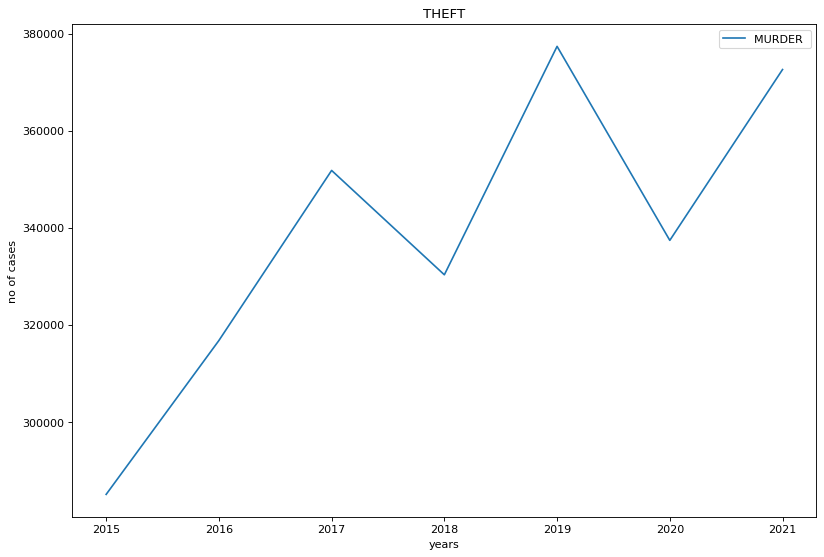

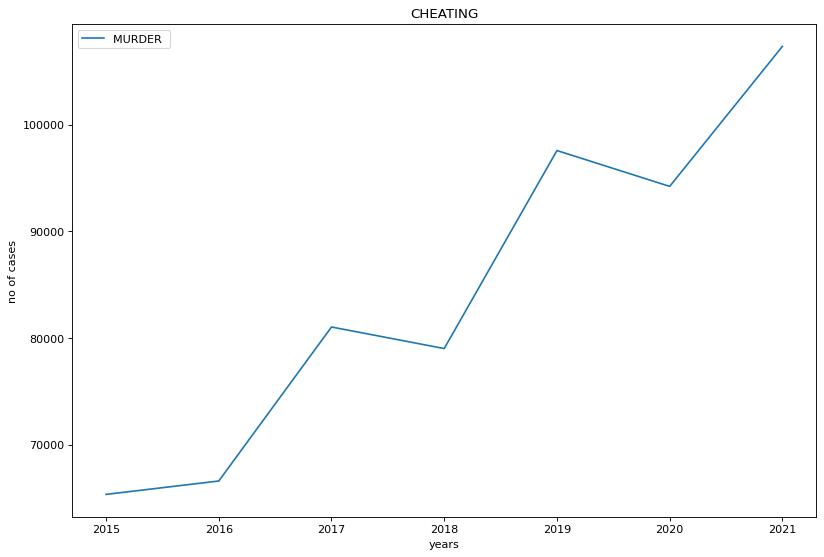

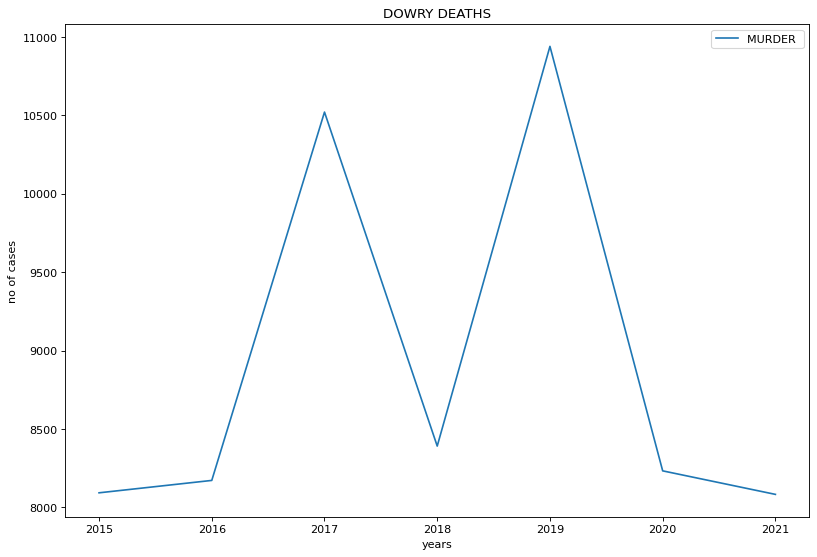

In [ ]:
for state in STATES_IN_INDIA:
  fig=plt.figure(figsize=(12,8), dpi=80, facecolor='w',edgecolor='k')
  plt.title(state)
  plt.xlabel('years')
  plt.ylabel('no of cases')
  for case in TYPES_OF_CASES:
    temp_df=df[(df['STATE/UT']==state) & (df['CRIME HEAD']== case )]
    if len(temp_df) > 0:
       N_cases=[temp_df[c].values[0]for c in years_title]
       plt.plot(years_title,N_cases)
  plt.legend(TYPES_OF_CASES)




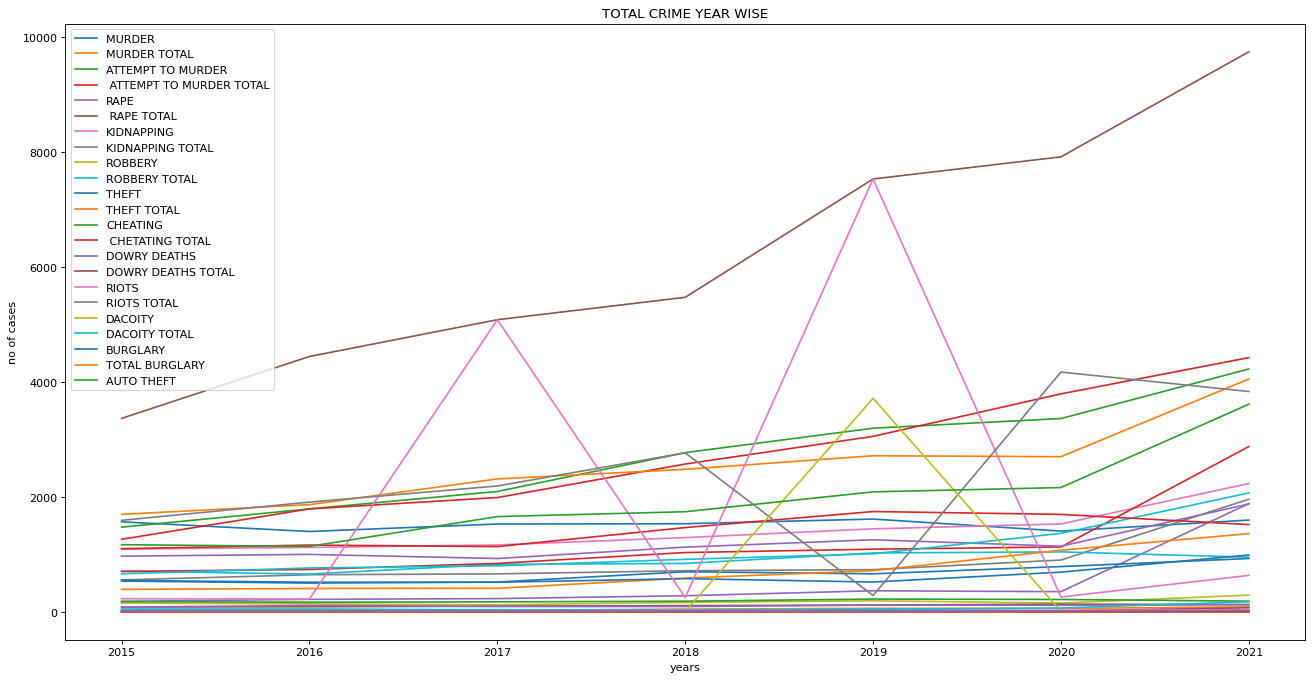

In [ ]:
fig=plt.figure(figsize=(20,10), dpi=80, facecolor='w',edgecolor='k')
plt.title('TOTAL CRIME YEAR WISE')
plt.xlabel('years')
plt.ylabel('no of cases')
for state in STATES_IN_INDIA:
    temp_df=df[(df['STATE/UT']==state) & (df['CRIME HEAD']=='KIDNAPPING' )]
    if len(temp_df) > 0:
        N_cases=[temp_df[c].values[0]for c in years_title]
        plt.plot(years_title,N_cases)
        plt.legend(TYPES_OF_CASES)


In [ ]:
from sklearn import preprocessing 
lab=preprocessing.LabelEncoder()
df['CRIME HEAD']=lab.fit_transform(df['CRIME HEAD'])
df.head()


,STATE/UT,CRIME HEAD,2015,2016,2017,2018,2019,2020,2021,2022
0,ANDHRA PRADESH,13,2665,2690,2449,2538,2808,2717,2484,1175
1,ARUNALACHALA PRADESH,13,68,72,59,75,65,73,69,86
2,ASSAM,13,1374,1426,1323,1223,1303,1368,1354,1451
3,BIHAR,13,3034,3139,3152,3362,3198,3566,3441,3403
4,CHHATTISGARH,13,1097,1169,1083,1065,1110,998,945,998


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
kmeans.fit(df.iloc[:,1:])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [ ]:
kmeans.cluster_centers_

array([[1.05746032e+01, 3.51460317e+02, 4.49882540e+02, 4.53034921e+02,
        3.77047619e+02, 5.80469841e+02, 3.97542857e+02, 4.55749206e+02,
        4.23330159e+02],
       [2.10000000e+01, 2.85043000e+05, 3.16761000e+05, 3.51820000e+05,
        3.30312000e+05, 3.77395000e+05, 3.37407000e+05, 3.72622000e+05,
        4.27122000e+05],
       [1.20000000e+01, 7.82720000e+04, 8.01605000e+04, 8.89930000e+04,
        8.45890000e+04, 9.78675000e+04, 9.35475000e+04, 1.05865500e+05,
        9.12890000e+04],
       [1.40769231e+01, 1.51069231e+04, 1.69403846e+04, 1.79966154e+04,
        1.87540000e+04, 1.78906154e+04, 1.97616923e+04, 2.17233077e+04,
        2.18033846e+04],
       [2.20000000e+01, 1.00255000e+05, 1.20032000e+05, 1.55401000e+05,
        1.47475000e+05, 1.72559000e+05, 1.54351000e+05, 1.65690000e+05,
        1.81200000e+05],
       [1.24285714e+01, 2.28372857e+04, 2.85290000e+04, 2.83987143e+04,
        2.74795714e+04, 3.31451429e+04, 3.13582857e+04, 3.68865714e+04,
        4.3

In [ ]:
import numpy as np

unique, count=np.unique(kmeans.labels_, return_counts=True)

dict_data=dict(zip(unique, count))
dict_data


{0: 315, 1: 1, 2: 2, 3: 13, 4: 1, 5: 7, 6: 23, 7: 2, 8: 68}

In [ ]:
df["cluster"]=kmeans.labels_

In [ ]:
kmeans.inertia_

13862436281.66532

In [ ]:

kmeans.score

<bound method _BaseKMeans.score of KMeans(n_clusters=9)>

In [ ]:
df

,STATE/UT,CRIME HEAD,2015,2016,2017,2018,2019,2020,2021,2022,cluster
0,ANDHRA PRADESH,13,2665,2690,2449,2538,2808,2717,2484,1175,8
1,ARUNALACHALA PRADESH,13,68,72,59,75,65,73,69,86,0
2,ASSAM,13,1374,1426,1323,1223,1303,1368,1354,1451,0
3,BIHAR,13,3034,3139,3152,3362,3198,3566,3441,3403,8
4,CHHATTISGARH,13,1097,1169,1083,1065,1110,998,945,998,0
...,...,...,...,...,...,...,...,...,...,...,...
427,DAMAN & DIU,4,28,31,27,29,33,42,25,24,0
428,DELHI UT,4,8874,11020,13224,14966,14668,14391,14916,23384,3
429,LAKSHADWEEP,4,2,1,5,0,0,1,0,0,0
430,PUDUCHERRY,4,498,443,502,384,511,462,386,285,0


In [ ]:
cust = [[13,2665,2690,2449,2538,2808,2717,2484,1175]] 
kmeans.predict(cust)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


8

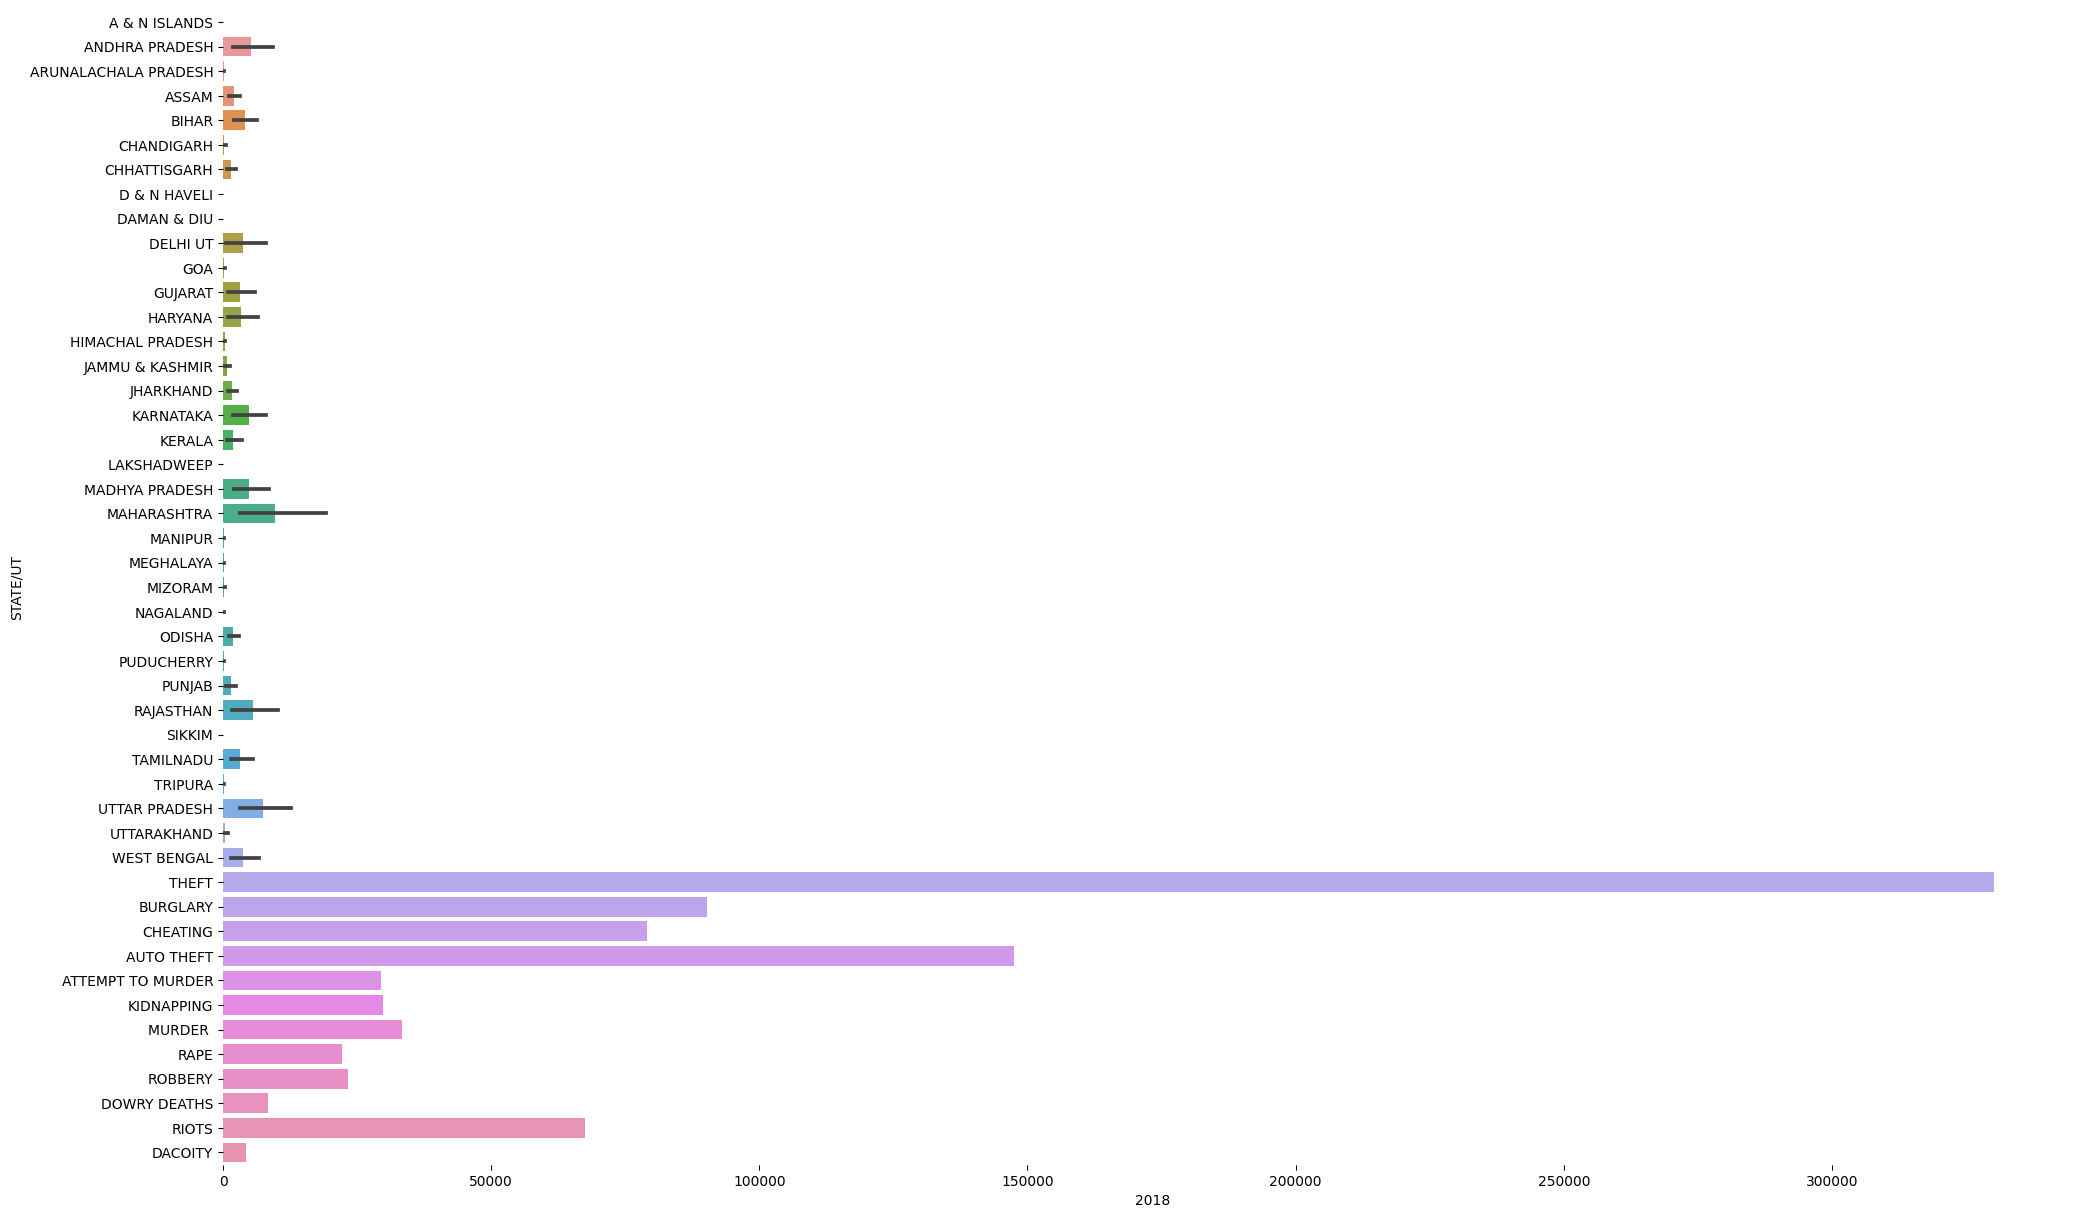

In [ ]:
f, ax= plt.subplots(figsize=(24,15))

stats = df.sort_values(["cluster", "STATE/UT"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="STATE/UT",x="2018",data=stats)

sns.despine(left=True, bottom=True)


In [ ]:
x = df.iloc[:,1:14]
y = df.iloc[:,df.columns=='cluster']

In [ ]:
print(x.head())

y.head()

   CRIME HEAD  2015  2016  2017  2018  2019  2020  2021  2022  cluster
0          13  2665  2690  2449  2538  2808  2717  2484  1175        8
1          13    68    72    59    75    65    73    69    86        0
2          13  1374  1426  1323  1223  1303  1368  1354  1451        0
3          13  3034  3139  3152  3362  3198  3566  3441  3403        8
4          13  1097  1169  1083  1065  1110   998   945   998        0


,cluster
0,8
1,0
2,0
3,8
4,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, )

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print(y_pred)

from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

clf=classification_report(y_pred,y_test)
print(clf)

[0 0 0 6 0 0 0 0 5 8 0 0 0 0 5 0 0 0 5 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 8
 8 0 8 0 6 0 8 0 0 0 8 0 0 0 3 0 0 0 0 0 0 0 8 0 8 0 0 6 0 0 0 2 0 0 8 0 0
 5 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 8 0 0 3 0 0 0 0 0
 0 0 0 8 5 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
Accuracy: 0.9846153846153847
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00        15

    accuracy                           0.98       130
   macro avg       0.62      0.60      0.61       130
weighted avg       0.99      0.98      0.99       130



<ipython-input-26-c269c8bac883>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

y_pred2 = log_reg.predict(x_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

clf2=classification_report(y_pred2, y_test)
print(clf2)

Accuracy: 0.3
              precision    recall  f1-score   support

           0       0.31      0.97      0.47        33
           1       0.00      0.00      0.00         6
           3       0.50      0.04      0.07        25
           4       0.00      0.00      0.00         0
           5       0.25      0.17      0.20         6
           6       0.20      0.04      0.07        25
           7       0.00      0.00      0.00         5
           8       0.27      0.13      0.18        30

    accuracy                           0.30       130
   macro avg       0.19      0.17      0.12       130
weighted avg       0.29      0.30      0.20       130



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
svm = SVC(kernel='linear', random_state=0)

svm.fit(x_train, y_train)

y_pred3 = svm.predict(x_test)

accuracy3 = accuracy_score(y_test, y_pred3)
print('Accuracy:', accuracy3)

clf3=classification_report(y_pred3, y_test)
print(clf3)


Accuracy: 0.9846153846153847
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           2       0.00      0.00      0.00         1
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         0
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00        15

    accuracy                           0.98       130
   macro avg       0.72      0.71      0.71       130
weighted avg       0.99      0.98      0.98       130



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_test: (130, 10)
Shape of y_test: (130, 1)


In [ ]:
lg = LinearRegression()

lg.fit(x, y)

y_pred4 = lg.predict(x)

mse = mean_squared_error(y, y_pred4)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.0152906892316616e-27


In [ ]:
linreg =LinearRegression()
linreg.fit(x_train, y_train)
y_pred4 = linreg.predict(x_test)
mse = np.mean((y_pred4 - y_test)**2)
accuracy4 = linreg.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


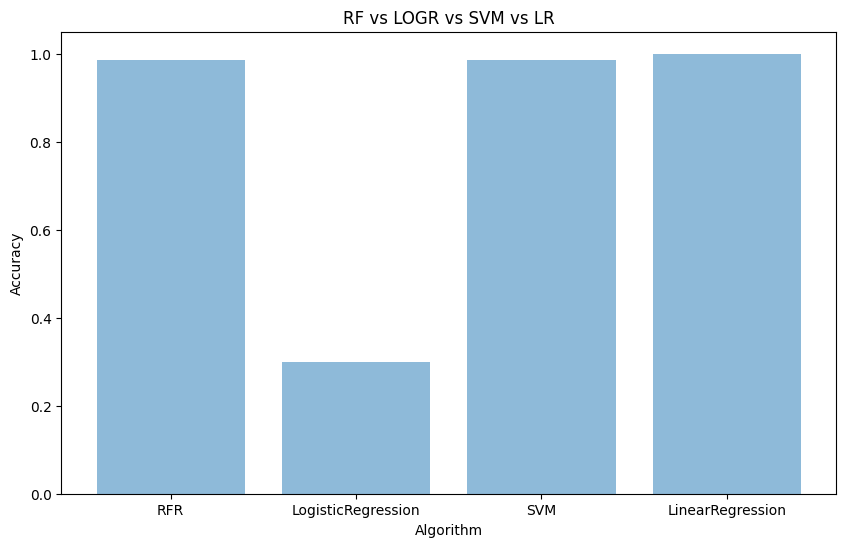

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('RFR', 'LogisticRegression', 'SVM', 'LinearRegression')
y_pos = np.arange(len(objects))
performance = (accuracy, accuracy2, accuracy3, accuracy4)

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(y_pos, performance, align='center', alpha=0.5, )
plt.xticks(y_pos, objects)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('RF vs LOGR vs SVM vs LR')
plt.show()
